# `streamline_data_clean.ipynb`

### Author: Anthony Hein

#### Last updated: 11/3/2021

# Overview:

This notebook is written well after the actual data cleaning took place. The purpose of this notebook is to replicate the results of cleaning data in a much cleaner fashion since it is known exactly what data will be used and what cleaning methods to use so less avenues have to be explored in the process. Of course, this does not invalidate any work done previously and cannot be a substitute because that would otherwise reverse cause and effect. In other words, we are able to write this slimmer notebook precisely because we wrote the larger notebooks which made us knowledgeable about the data.

This is primarily for ease of reproduction by other users.

---

## Setup

In [1]:
from datetime import datetime, timedelta
import git
import os
import re
from typing import List
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
BASE_DIR = git.Repo(os.getcwd(), search_parent_directories=True).working_dir
BASE_DIR

'/Users/anthonyhein/Desktop/SML310/project'

---

## Load `horses_selected_trimmed.csv`

In [3]:
horses_selected_trimmed = pd.read_csv(f"{BASE_DIR}/data/streamline/horses_selected_trimmed.csv", low_memory=False) 
horses_selected_trimmed.head()

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,outHandicap,RPR,TR,OR,father,mother,gfather,weight,res_win,res_place
0,302858,Kings Return,6.0,4.0,0.600000,1,W P Mullins,D J Casey,1,NaN,...,NaN,102.0,NaN,NaN,King's Ride,Browne's Return,Deep Run,73,1.0,1.0
1,302858,Majestic Red I,6.0,5.0,0.047619,0,John Hackett,Conor O'Dwyer,2,8,...,NaN,94.0,NaN,NaN,Long Pond,Courtlough Lady,Giolla Mear,73,0.0,1.0
2,302858,Clearly Canadian,6.0,2.0,0.166667,0,D T Hughes,G Cotter,3,1.5,...,NaN,92.0,NaN,NaN,Nordico,Over The Seas,North Summit,71,0.0,0.0
3,302858,Bernestic Wonder,8.0,1.0,0.058824,0,E McNamara,J Old Jones,4,dist,...,NaN,NaN,NaN,NaN,Roselier,Miss Reindeer,Reindeer,73,0.0,0.0
4,302858,Beauty's Pride,5.0,6.0,0.038462,0,J J Lennon,T Martin,5,dist,...,NaN,NaN,NaN,NaN,Noalto,Elena's Beauty,Tarqogan,66,0.0,0.0


In [4]:
horses_selected_trimmed.shape

(205138, 21)

In [5]:
horses_selected_trimmed_clean = horses_selected_trimmed.copy()
horses_selected_trimmed_clean.head()

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,outHandicap,RPR,TR,OR,father,mother,gfather,weight,res_win,res_place
0,302858,Kings Return,6.0,4.0,0.600000,1,W P Mullins,D J Casey,1,NaN,...,NaN,102.0,NaN,NaN,King's Ride,Browne's Return,Deep Run,73,1.0,1.0
1,302858,Majestic Red I,6.0,5.0,0.047619,0,John Hackett,Conor O'Dwyer,2,8,...,NaN,94.0,NaN,NaN,Long Pond,Courtlough Lady,Giolla Mear,73,0.0,1.0
2,302858,Clearly Canadian,6.0,2.0,0.166667,0,D T Hughes,G Cotter,3,1.5,...,NaN,92.0,NaN,NaN,Nordico,Over The Seas,North Summit,71,0.0,0.0
3,302858,Bernestic Wonder,8.0,1.0,0.058824,0,E McNamara,J Old Jones,4,dist,...,NaN,NaN,NaN,NaN,Roselier,Miss Reindeer,Reindeer,73,0.0,0.0
4,302858,Beauty's Pride,5.0,6.0,0.038462,0,J J Lennon,T Martin,5,dist,...,NaN,NaN,NaN,NaN,Noalto,Elena's Beauty,Tarqogan,66,0.0,0.0


---

## Load `races_selected_augment_with_weather_trimmed.csv`

In [6]:
races_selected_trimmed = pd.read_csv(f"{BASE_DIR}/data/streamline/races_selected_augment_with_weather_trimmed.csv",
                                     low_memory=False) 
races_selected_trimmed.head()

,rid,course,title,winningTime,metric,ncond,class,runners,margin,1st_place_rank_in_odds,...,station name,station lat,station lng,dist to station,station reading date,temp,msl,rain,rhum,station reading timedelta
0,302858,Thurles,Liffey Maiden Hurdle (Div 1),277.2,3821.0,1,0,6,1.219263,1,...,BIRR,53.0525,-7.5325,45.288813,1/9/97 12:00,1.6,1012.4,0.0,87,15.0
1,291347,Punchestown,Ericsson G.S.M. Grand National Trial Handicap ...,447.2,5229.0,5,0,9,1.218049,4,...,CASEMENT,53.1820,-6.2620,24.477602,2/16/97 15:00,8.0,992.5,0.4,87,20.0
2,75447,Listowel,Ballybunion E.B.F. Beginners S'chase,318.4,3620.0,5,0,8,1.277320,3,...,SHANNON AIRPORT,52.4125,-8.5505,63.534139,3/1/97 14:00,12.0,1003.5,0.0,73,0.0
3,358038,Punchestown,Quinns Of Baltinglass Chase (La Touche) (Cross...,533.9,6637.0,1,0,10,1.286595,1,...,CASEMENT,53.1820,-6.2620,24.477602,4/24/97 14:00,12.6,1011.9,0.0,72,20.0
4,78982,Dundalk,Carlingford Handicap Chase,370.3,4827.0,8,0,4,1.090018,1,...,CLONES,54.1100,-7.1400,50.368275,5/2/97 14:00,21.3,1021.4,0.0,44,135.0


In [7]:
races_selected_trimmed.shape

(20574, 34)

In [8]:
races_selected_trimmed_clean = races_selected_trimmed.copy()
races_selected_trimmed_clean.head()

,rid,course,title,winningTime,metric,ncond,class,runners,margin,1st_place_rank_in_odds,...,station name,station lat,station lng,dist to station,station reading date,temp,msl,rain,rhum,station reading timedelta
0,302858,Thurles,Liffey Maiden Hurdle (Div 1),277.2,3821.0,1,0,6,1.219263,1,...,BIRR,53.0525,-7.5325,45.288813,1/9/97 12:00,1.6,1012.4,0.0,87,15.0
1,291347,Punchestown,Ericsson G.S.M. Grand National Trial Handicap ...,447.2,5229.0,5,0,9,1.218049,4,...,CASEMENT,53.1820,-6.2620,24.477602,2/16/97 15:00,8.0,992.5,0.4,87,20.0
2,75447,Listowel,Ballybunion E.B.F. Beginners S'chase,318.4,3620.0,5,0,8,1.277320,3,...,SHANNON AIRPORT,52.4125,-8.5505,63.534139,3/1/97 14:00,12.0,1003.5,0.0,73,0.0
3,358038,Punchestown,Quinns Of Baltinglass Chase (La Touche) (Cross...,533.9,6637.0,1,0,10,1.286595,1,...,CASEMENT,53.1820,-6.2620,24.477602,4/24/97 14:00,12.6,1011.9,0.0,72,20.0
4,78982,Dundalk,Carlingford Handicap Chase,370.3,4827.0,8,0,4,1.090018,1,...,CLONES,54.1100,-7.1400,50.368275,5/2/97 14:00,21.3,1021.4,0.0,44,135.0


---

## Clean Horse Data

In [9]:
print("The following columns have null values (if nothing is printed below, there are no null values):")

for column in horses_selected_trimmed_clean.columns:
    if sum(horses_selected_trimmed_clean[column].isnull()) > 0:
        print(f"  - {column}")

The following columns have null values (if nothing is printed below, there are no null values):
  - age
  - saddle
  - positionL
  - dist
  - outHandicap
  - RPR
  - TR
  - OR
  - father
  - mother
  - gfather


### `age`

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

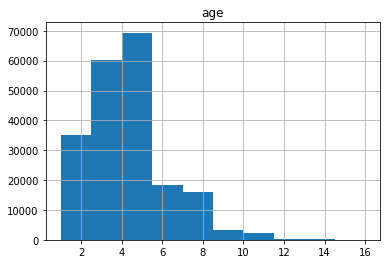

In [10]:
horses_selected_trimmed_clean.hist('age')

In [11]:
len(horses_selected_trimmed_clean[horses_selected_trimmed_clean['age'] <= 0])

0

In [12]:
len(horses_selected_trimmed_clean[horses_selected_trimmed_clean['age'].isnull()])

2

Since there are only two entries with a null age, we can drop these to make our dataset cleaner without many consequences.

In [13]:
entries_w_nan_age = horses_selected_trimmed_clean[
    horses_selected_trimmed_clean['age'].isnull()
]
len(entries_w_nan_age)

2

In [14]:
horses_selected_trimmed_clean = horses_selected_trimmed_clean[
    ~horses_selected_trimmed_clean['rid'].isin(entries_w_nan_age['rid'])
]

horses_selected_trimmed_clean.shape

(205121, 21)

In [15]:
races_selected_trimmed_clean = races_selected_trimmed_clean[
    ~races_selected_trimmed_clean['rid'].isin(entries_w_nan_age['rid'])
]

races_selected_trimmed_clean.shape

(20572, 34)

### `saddle`

Let's see how many races have a horse which lacks saddle information.

array([[<AxesSubplot:title={'center':'saddle'}>]], dtype=object)

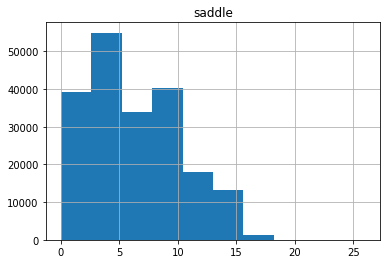

In [16]:
horses_selected_trimmed_clean.hist('saddle')

In [17]:
len(horses_selected_trimmed_clean[horses_selected_trimmed_clean['saddle'] < 0])

0

In [18]:
len(horses_selected_trimmed_clean[horses_selected_trimmed_clean['saddle'] == 0])

2508

Why might there be `saddle = 0`?

In [19]:
horses_selected_trimmed_clean[horses_selected_trimmed_clean['saddle'] == 0]

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,outHandicap,RPR,TR,OR,father,mother,gfather,weight,res_win,res_place
775,48790,Faha Gig,5.0,0.0,0.307692,1,Gerard Cully,Mr P F Graffin,1,NaN,...,NaN,NaN,NaN,NaN,Hatim,Hazel Gig,Captain's Gig,69,1.0,1.0
776,48790,Stylish Stepper,9.0,0.0,0.200000,0,James Dunne,Mr A K Wyse,2,14,...,NaN,NaN,NaN,NaN,Boreen,African Moon I,Tobrouk,73,0.0,1.0
777,48790,Flahertys Best VI,7.0,0.0,0.047619,0,L Young,Miss M Olivefalk,3,20,...,NaN,NaN,NaN,NaN,Major Point,Corran View,Kambalda,72,0.0,0.0
778,48790,Bonzer Bob,8.0,0.0,0.181818,0,Lady Earle,Mr G Caplis,40,NaN,...,NaN,NaN,NaN,NaN,Kemal,Timber Line,High Line,73,0.0,0.0
779,48790,Tropical Gabriel,6.0,0.0,0.200000,0,P J Healy,Mr P J Healy,40,NaN,...,NaN,NaN,NaN,NaN,Invited,Shimering Star,Mon Capitaine,76,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,59375,Martins Party,8.0,0.0,0.019608,0,W T Murphy,Mr W T Murphy,5,6,...,NaN,NaN,NaN,NaN,Baragoi,Borballea,Balliol I,74,0.0,0.0
3296,88336,Aries Girl,4.0,0.0,0.600000,1,Patrick J Flynn,Mr E Norris,1,NaN,...,NaN,NaN,NaN,NaN,Valiyar,Ravaro,Raga Navarro,71,1.0,1.0
3297,88336,Redeemyourself,4.0,0.0,0.058824,0,Jeremiah Ryan,Mr M Phillips,2,.5,...,NaN,NaN,NaN,NaN,Royal Fountain,Reve Clair,Deep Run,72,0.0,0.0
3298,88336,Kiladante,4.0,0.0,0.222222,0,A P O'Brien,Mr G F Ryan,3,1.5,...,NaN,NaN,NaN,NaN,Phardante,Marble Cloud,Hard Tack,71,0.0,0.0


This suggests that maybe this is just because it wasn't collected for a race, while everything else was. Let's see if the following statement is true:

"Wherever `saddle = 0`, all other horses in this race have `saddle = 0`."

In [20]:
total = 0

for rid in set(horses_selected_trimmed_clean[horses_selected_trimmed_clean['saddle'] == 0]['rid']):
    total += races_selected_trimmed_clean[races_selected_trimmed_clean['rid'] == rid].iloc[0]['runners']
    
total

2508

Perfect, our hypothesis is correct since this matches the total number of rows in the horses dataset where `saddle = 0`. Therefore, we do not have to drop these rows, since it makes imputing their values easier since we can put all horses on equal footing by making any saddle number. For consistency, we will replace `saddle = 0` with `saddle = NaN`.

In [21]:
horses_selected_trimmed_clean['saddle'] = horses_selected_trimmed_clean['saddle'].map(
    lambda x: np.nan if x == 0 else x
)

In [22]:
len(horses_selected_trimmed_clean[horses_selected_trimmed_clean['saddle'] == 0])

0

Next, we check where `saddle = NaN`.

In [23]:
len(horses_selected_trimmed_clean[horses_selected_trimmed_clean['saddle'].isnull()])

6437

We may be able to correct those races where exactly one horse has missing saddle data.

In [24]:
entries_w_bad_saddle = horses_selected_trimmed_clean[
    horses_selected_trimmed_clean['saddle'].isnull()
]
len(entries_w_bad_saddle)

6437

In [25]:
rids_exactly_one_bad_saddle = []

for k, v in entries_w_bad_saddle['rid'].value_counts().items():
    if v == 1:
        rids_exactly_one_bad_saddle.append(k)
        
len(rids_exactly_one_bad_saddle)

2

In [26]:
horses_selected_trimmed_clean[
    horses_selected_trimmed_clean['rid'].isin(rids_exactly_one_bad_saddle)
]

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,outHandicap,RPR,TR,OR,father,mother,gfather,weight,res_win,res_place
117894,374801,Little Theatre,4.0,12.0,0.222222,0,F Flood,P W Flood,1,NaN,...,NaN,98.0,NaN,NaN,Old Vic,Indian Project,Project Manager,67,1.0,1.0
117895,374801,Fairytaleofnewyork,4.0,10.0,0.066667,0,P Beirne,M O'Connor,2,2,...,NaN,96.0,NaN,NaN,Zaffaran,Hi Honey,Persian Mews,67,0.0,1.0
117896,374801,Hillka's Story,4.0,11.0,0.058824,0,Patrick Martin,J F Levins,3,.75,...,NaN,95.0,NaN,NaN,Desert Story,Hillka,Danehill,67,0.0,1.0
117897,374801,Lady Presenting,4.0,NaN,0.047619,0,R McGlinchey,D Kane,40,2,...,NaN,93.0,NaN,NaN,Presenting,The Furnituremaker,Mandalus,67,0.0,0.0
117898,374801,Bannagroe,4.0,9.0,0.117647,0,Ms Caroline Hutchinson,Ms C Hutchinson,4,hd,...,NaN,93.0,NaN,NaN,Oscar Schindler,The Bratpack,Mister Majestic,70,0.0,0.0
117899,374801,Lomagundi Road,4.0,6.0,0.066667,0,Gerard Keane,Mr R L Cully,5,3.5,...,NaN,95.0,NaN,NaN,Lycius,Olivana I,Sparkler I,69,0.0,0.0
117900,374801,Buster Collins,4.0,1.0,0.111111,0,Miss G Lee,Niall P Madden,6,3,...,NaN,92.0,NaN,NaN,Alderbrook,Carmen,Meneval,71,0.0,0.0
117901,374801,Derrynane Pearl,4.0,4.0,0.181818,0,S Donohoe,Ms N Carberry,7,dist,...,NaN,NaN,NaN,NaN,Anshan,Second Violin,Cataldi,69,0.0,0.0
117902,374801,Toto's Star,4.0,7.0,0.100000,0,Jarlath P Fahey,Mr P Fahey,8,2,...,NaN,NaN,NaN,NaN,Fourstars Allstar,Be My Toto,Be My Native,73,0.0,0.0
117903,374801,King's Journey,4.0,5.0,0.090909,0,Gerard O'Leary,Andrew Leigh,9,20,...,NaN,NaN,NaN,NaN,King's Theatre,Return Journey,Pennine Walk,69,0.0,0.0


In fact, neither of these can be corrected due to nonconsecutive saddle numbers, introduced by the inclusion of alternates.

We won't drop values where there is `saddle = NaN`; we will try to impute these where we can.

### `decimalPrice`

The `decimalPrice` variable looks okay.

In [27]:
len(horses_selected_trimmed_clean[horses_selected_trimmed_clean['decimalPrice'] <= 0])

0

array([[<AxesSubplot:title={'center':'decimalPrice'}>]], dtype=object)

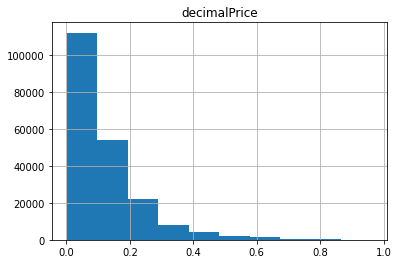

In [28]:
horses_selected_trimmed_clean.hist('decimalPrice')

### `isFav`

The `isFav` variable looks okay.

array([[<AxesSubplot:title={'center':'isFav'}>]], dtype=object)

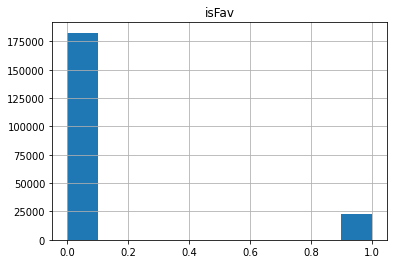

In [29]:
horses_selected_trimmed_clean.hist('isFav')

### `position`

array([[<AxesSubplot:title={'center':'position'}>]], dtype=object)

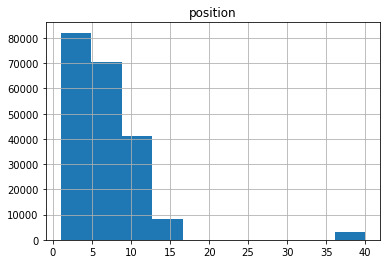

In [30]:
horses_selected_trimmed_clean.hist('position')

In [31]:
horses_selected_trimmed_clean['position'].value_counts()

1     20612
2     20592
3     20558
4     20339
5     19661
6     18403
7     17108
8     15353
9     13338
10    11290
11     9165
12     7256
13     5230
40     3180
14     3034
15        1
16        1
Name: position, dtype: int64

The 15 appears to be extraneous.

In [32]:
horses_selected_trimmed_clean[
    horses_selected_trimmed_clean['position'] == 15
]

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,outHandicap,RPR,TR,OR,father,mother,gfather,weight,res_win,res_place
171219,189589,September Sun,7.0,9.0,0.047619,0,Oliver Finnegan,Mr J O Finnegan,15,dist,...,NaN,NaN,NaN,NaN,Jurado,Ollie's Pet,Tiepolo II,70,0.0,0.0


In [33]:
horses_selected_trimmed_clean[
    horses_selected_trimmed_clean['rid'] == 189589
]

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,outHandicap,RPR,TR,OR,father,mother,gfather,weight,res_win,res_place
171206,189589,Electric Flower,6.0,1.0,0.555556,1,Anthony Mullins,Mr P G Murphy,1,NaN,...,NaN,103.0,NaN,NaN,Jolly Jake,Ballybrennan,Decent Fellow,73,1.0,1.0
171207,189589,Hunting Spirit,7.0,7.0,0.029412,0,P E I Newell,Mr P E I Newell,2,3,...,NaN,91.0,NaN,NaN,Treasure Hunter,Song Of Love,Raise You Ten,70,0.0,1.0
171208,189589,Santavino,5.0,14.0,0.111111,0,Joseph Crowley,Mr G J Power,3,1.5,...,NaN,89.0,NaN,NaN,Be My Native,Deep Kitty,Deep Run,70,0.0,1.0
171209,189589,Glen's Gold,5.0,5.0,0.076923,0,G A Kingston,Philip Dempsey,4,1.5,...,NaN,92.0,NaN,NaN,Semillon,Glen's Pride,Furry Glen,75,0.0,0.0
171210,189589,Palace Queen,5.0,13.0,0.125000,0,Peter Casey,Mr P J Casey,5,2,...,NaN,85.0,NaN,NaN,Namaqualand,Fashion Queen I,Chilibang,72,0.0,0.0
171211,189589,Aspharasyousee,5.0,3.0,0.111111,0,Patrick Martin,Denis O'Regan,6,nk,...,NaN,90.0,NaN,NaN,Phardante,Brave Express,Brave Invader,72,0.0,0.0
171212,189589,Konker Hero,7.0,2.0,0.142857,0,W J Lanigan,Roger Loughran,7,1.5,...,NaN,89.0,NaN,NaN,Conquering Hero,Another Contact,Martin John,73,0.0,0.0
171213,189589,Ocras Mor,5.0,12.0,0.066667,0,Suzanne Cox,Miss M D Cox,8,hd,...,NaN,83.0,NaN,NaN,Old Vic,Special Trix,Peacock I,70,0.0,0.0
171214,189589,Touletta,6.0,10.0,0.047619,0,Colm A Cronin,Mr C A Cronin,9,.5,...,NaN,84.0,NaN,NaN,Toulon,Toretta,Torus,70,0.0,0.0
171215,189589,Pinkeen Bridge,5.0,6.0,0.066667,0,Miss S Collins,Mr R O'Sullivan,10,.75,...,NaN,87.0,NaN,NaN,Broken Hearted,Worth A Wish,Stetchworth,72,0.0,0.0


Indeed, this is a mistake. We can correct this.

In [34]:
horses_selected_trimmed_clean.at[171217, 'position'] = 12
horses_selected_trimmed_clean.at[171218, 'position'] = 13
horses_selected_trimmed_clean.at[171219, 'position'] = 14

In [35]:
horses_selected_trimmed_clean[
    horses_selected_trimmed_clean['rid'] == 189589
]

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,outHandicap,RPR,TR,OR,father,mother,gfather,weight,res_win,res_place
171206,189589,Electric Flower,6.0,1.0,0.555556,1,Anthony Mullins,Mr P G Murphy,1,NaN,...,NaN,103.0,NaN,NaN,Jolly Jake,Ballybrennan,Decent Fellow,73,1.0,1.0
171207,189589,Hunting Spirit,7.0,7.0,0.029412,0,P E I Newell,Mr P E I Newell,2,3,...,NaN,91.0,NaN,NaN,Treasure Hunter,Song Of Love,Raise You Ten,70,0.0,1.0
171208,189589,Santavino,5.0,14.0,0.111111,0,Joseph Crowley,Mr G J Power,3,1.5,...,NaN,89.0,NaN,NaN,Be My Native,Deep Kitty,Deep Run,70,0.0,1.0
171209,189589,Glen's Gold,5.0,5.0,0.076923,0,G A Kingston,Philip Dempsey,4,1.5,...,NaN,92.0,NaN,NaN,Semillon,Glen's Pride,Furry Glen,75,0.0,0.0
171210,189589,Palace Queen,5.0,13.0,0.125000,0,Peter Casey,Mr P J Casey,5,2,...,NaN,85.0,NaN,NaN,Namaqualand,Fashion Queen I,Chilibang,72,0.0,0.0
171211,189589,Aspharasyousee,5.0,3.0,0.111111,0,Patrick Martin,Denis O'Regan,6,nk,...,NaN,90.0,NaN,NaN,Phardante,Brave Express,Brave Invader,72,0.0,0.0
171212,189589,Konker Hero,7.0,2.0,0.142857,0,W J Lanigan,Roger Loughran,7,1.5,...,NaN,89.0,NaN,NaN,Conquering Hero,Another Contact,Martin John,73,0.0,0.0
171213,189589,Ocras Mor,5.0,12.0,0.066667,0,Suzanne Cox,Miss M D Cox,8,hd,...,NaN,83.0,NaN,NaN,Old Vic,Special Trix,Peacock I,70,0.0,0.0
171214,189589,Touletta,6.0,10.0,0.047619,0,Colm A Cronin,Mr C A Cronin,9,.5,...,NaN,84.0,NaN,NaN,Toulon,Toretta,Torus,70,0.0,0.0
171215,189589,Pinkeen Bridge,5.0,6.0,0.066667,0,Miss S Collins,Mr R O'Sullivan,10,.75,...,NaN,87.0,NaN,NaN,Broken Hearted,Worth A Wish,Stetchworth,72,0.0,0.0


The 16 also appears extraneous.

In [36]:
horses_selected_trimmed_clean[
    horses_selected_trimmed_clean['position'] == 16
]

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,outHandicap,RPR,TR,OR,father,mother,gfather,weight,res_win,res_place
192716,374982,Mcauley Jo,6.0,NaN,0.038462,0,William James McAuley,Mr N G Kinnaird,16,dist,...,NaN,NaN,NaN,NaN,Detroit Sam,Ashley Jo,Boreen,70,0.0,0.0


In [37]:
horses_selected_trimmed_clean[
    horses_selected_trimmed_clean['rid'] == 374982
]

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,outHandicap,RPR,TR,OR,father,mother,gfather,weight,res_win,res_place
192703,374982,Grasp The Nettle,6.0,NaN,0.250000,0,Edward U Hales,Mr G J Harford,1,NaN,...,NaN,106.0,NaN,NaN,Henbit,Euroville Lady,Light Brigade,76,1.0,1.0
192704,374982,Strong Wishes,6.0,NaN,0.307692,1,E Bolger,Mr J T McNamara,2,1.5,...,NaN,100.0,NaN,NaN,Strong Gale,Totsiens,Three Wishes I,71,0.0,1.0
192705,374982,West Of Waikiki,6.0,NaN,0.142857,0,W P Mullins,R Walsh,3,2.5,...,NaN,102.0,NaN,NaN,Hatim,Shahrazad,Young Emperor,76,0.0,1.0
192706,374982,King Of The Ocean,6.0,NaN,0.166667,0,J C Hayden,Mr Steven E Ryder,4,2,...,NaN,100.0,NaN,NaN,King's Ride,Jacqueline's Glen,Furry Glen,73,0.0,0.0
192707,374982,Half Barrell,6.0,NaN,0.058824,0,V T O'Brien,D J Kelly,5,14,...,NaN,86.0,NaN,NaN,Lord Americo,Araybeam VII,Pedigree Unregistered,73,0.0,0.0
192708,374982,Harvest Time,7.0,NaN,0.047619,0,John J Cullen,Mr T Doyle,6,nk,...,NaN,81.0,NaN,NaN,Andretti I,Double Rein,Strong Gale,70,0.0,0.0
192709,374982,Dunmore Supreme,6.0,NaN,0.029412,0,Hans Jurgen Kuhnle,Miss E Doyle,7,10,...,NaN,76.0,NaN,NaN,Supreme Leader,Regal Santa,Royal And Regal,73,0.0,0.0
192710,374982,Fisher King Bob,6.0,NaN,0.029412,0,Miss Suzy Barkley,Mr F McGirr,8,20,...,NaN,56.0,NaN,NaN,Starlan,Pearl Locket,Gulf Pearl,73,0.0,0.0
192711,374982,Earl Of Naas,7.0,NaN,0.029412,0,M McDonagh,Mr K N McDonagh,9,dist,...,NaN,NaN,NaN,NaN,Lancastrian,Mount Rela,Mount Hagen,73,0.0,0.0
192712,374982,Up In The Air,8.0,NaN,0.047619,0,W M Roper,Mr P Fahey,10,.5,...,NaN,NaN,NaN,NaN,Tremblant,Burton Brown,Torus,73,0.0,0.0


We can similarly correct this.

In [38]:
horses_selected_trimmed_clean.at[192716, 'position'] = 14

In [39]:
horses_selected_trimmed_clean[
    horses_selected_trimmed_clean['rid'] == 189589
]

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,outHandicap,RPR,TR,OR,father,mother,gfather,weight,res_win,res_place
171206,189589,Electric Flower,6.0,1.0,0.555556,1,Anthony Mullins,Mr P G Murphy,1,NaN,...,NaN,103.0,NaN,NaN,Jolly Jake,Ballybrennan,Decent Fellow,73,1.0,1.0
171207,189589,Hunting Spirit,7.0,7.0,0.029412,0,P E I Newell,Mr P E I Newell,2,3,...,NaN,91.0,NaN,NaN,Treasure Hunter,Song Of Love,Raise You Ten,70,0.0,1.0
171208,189589,Santavino,5.0,14.0,0.111111,0,Joseph Crowley,Mr G J Power,3,1.5,...,NaN,89.0,NaN,NaN,Be My Native,Deep Kitty,Deep Run,70,0.0,1.0
171209,189589,Glen's Gold,5.0,5.0,0.076923,0,G A Kingston,Philip Dempsey,4,1.5,...,NaN,92.0,NaN,NaN,Semillon,Glen's Pride,Furry Glen,75,0.0,0.0
171210,189589,Palace Queen,5.0,13.0,0.125000,0,Peter Casey,Mr P J Casey,5,2,...,NaN,85.0,NaN,NaN,Namaqualand,Fashion Queen I,Chilibang,72,0.0,0.0
171211,189589,Aspharasyousee,5.0,3.0,0.111111,0,Patrick Martin,Denis O'Regan,6,nk,...,NaN,90.0,NaN,NaN,Phardante,Brave Express,Brave Invader,72,0.0,0.0
171212,189589,Konker Hero,7.0,2.0,0.142857,0,W J Lanigan,Roger Loughran,7,1.5,...,NaN,89.0,NaN,NaN,Conquering Hero,Another Contact,Martin John,73,0.0,0.0
171213,189589,Ocras Mor,5.0,12.0,0.066667,0,Suzanne Cox,Miss M D Cox,8,hd,...,NaN,83.0,NaN,NaN,Old Vic,Special Trix,Peacock I,70,0.0,0.0
171214,189589,Touletta,6.0,10.0,0.047619,0,Colm A Cronin,Mr C A Cronin,9,.5,...,NaN,84.0,NaN,NaN,Toulon,Toretta,Torus,70,0.0,0.0
171215,189589,Pinkeen Bridge,5.0,6.0,0.066667,0,Miss S Collins,Mr R O'Sullivan,10,.75,...,NaN,87.0,NaN,NaN,Broken Hearted,Worth A Wish,Stetchworth,72,0.0,0.0


### `positionL`

Recall, ensuring a non-null `positionL` for horses with positions other than 1 or 40 was part of the data selection process. So, all that remains are null `positionL` for horses in these positions.

In [40]:
entries_w_bad_positionL = horses_selected_trimmed_clean[
    horses_selected_trimmed_clean['positionL'].isnull() &
    (~horses_selected_trimmed_clean['position'].isin([1,40]))
]
len(entries_w_bad_positionL)

0

Symmetrically, check that all horses in position 1 or 40 had a `positionL` of `NaN`.

In [41]:
entries_w_bad_positionL =horses_selected_trimmed_clean[
    horses_selected_trimmed_clean['position'].isin([1,40]) &
    (~pd.isna(horses_selected_trimmed_clean['positionL']))
]
len(entries_w_bad_positionL)

188

This is not the case. But, the `positionL` variable has no meaning in the case of 1 or 40, so we will correct these values. Probably the result of bad data entry. By the definition, the `positionL` for entries with `position = 1` should be 0. It is harder to say for `position = 40`, though we must infer som value to make this calculation reasonable. We will choose to use 1 "dist", which is 30 lengths and is the largest unit that horse statisticians use. This is the equivalent to saying "the horse did indeed finish the race, but it kind of hobbled in well after everyone else". The alternative is to drop all entries with `position = 40`, which would make us lose too much data.

In [42]:
for idx, row in tqdm(horses_selected_trimmed_clean.iterrows()):
    if row['position'] == 1:
        horses_selected_trimmed_clean.at[idx,'positionL'] = 0
    if row['position'] == 40:
        horses_selected_trimmed_clean.at[idx,'positionL'] = 30

205121it [00:08, 23309.36it/s]


In [43]:
horses_selected_trimmed_clean[horses_selected_trimmed_clean['position'].isin([1,40])]['positionL'].value_counts()

0     20612
30     3180
Name: positionL, dtype: int64

### `dist`

The current `dist` column within our horses dataset calculates the distance to a placing horse, not the winning horse. That is, it is the distance to the horse in second place. Since our goal is to convert distance information into raw race times, this is not helpful and we instead want to know the distance to the horse in first (the only one for which we know the racing time). To do so, we will recalculate the distance to first place and change the current `dist` variable to reflect this.

In [44]:
import sys
sys.path.append(f'{BASE_DIR}/utils/')

from length_abbrv_to_dist import LENGTH_ABBRV_TO_DIST

In [45]:
def get_dist_of_horse(df: pd.core.frame.DataFrame, idx: int) -> float:
    """
    Given a dataframe `df` that represents a race, calculate the `dist`
    of the horse with identifier `idx`.
    """
    
    df = df.sort_values(by=['position'])
    
    # cumulative distance to the runner in 1st place
    dist = 0
    
    # there may be ties for a position
    curr_position = 1
    
    # for all entries in this race
    for _, row in df.iterrows():
        
        lengths = row['positionL']
        
        # some `positionL` values are strings encoding length information
        try:
            lengths = float(lengths)
        except:
            lengths = LENGTH_ABBRV_TO_DIST[lengths]
            
        # be careful about changing the current position bc of ties
        curr_position = row['position']
       
        # accumulate distance so long as we are not looking at nonfinishing horses
        if curr_position != 40:
            dist += lengths
        
        # found the desired horse
        if int(row.name) == idx:
            return dist + (lengths if curr_position == 40 else 0)

The correctness of this function is demonstrated elsewhere.

In [46]:
for idx, entry in tqdm(horses_selected_trimmed_clean.iterrows()):
    df = horses_selected_trimmed_clean[horses_selected_trimmed_clean['rid'] == entry['rid']]
    dist = get_dist_of_horse(df, idx)
    horses_selected_trimmed_clean.at[idx, 'dist'] = dist

205121it [03:23, 1009.06it/s]


In [47]:
horses_selected_trimmed_clean['dist'] = horses_selected_trimmed_clean['dist'].astype(float)

array([[<AxesSubplot:title={'center':'dist'}>]], dtype=object)

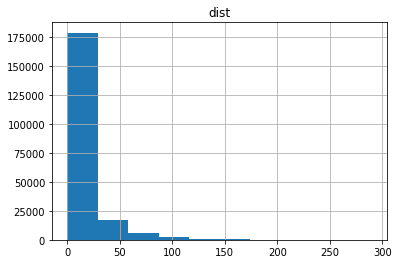

In [48]:
horses_selected_trimmed_clean.hist('dist')

### `outHandicap`

A handicap is an opt-in service and is _not_ the default, so we infer values to be 0. Most entries have `outHandicap = NaN` anyways, so this most likely will not be influential.

In [49]:
len(horses_selected_trimmed_clean[
    horses_selected_trimmed_clean['outHandicap'].isnull()
])

202531

In [50]:
horses_selected_trimmed_clean['outHandicap'] = horses_selected_trimmed_clean['outHandicap'].fillna(0)

In [51]:
len(horses_selected_trimmed_clean[
    horses_selected_trimmed_clean['outHandicap'].isnull()
])

0

array([[<AxesSubplot:title={'center':'outHandicap'}>]], dtype=object)

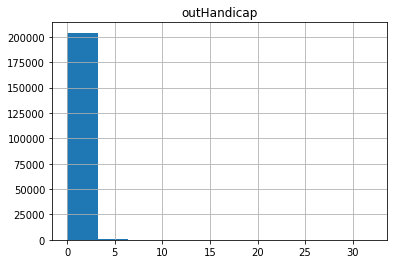

In [52]:
horses_selected_trimmed_clean.hist('outHandicap')

### `RPR`

We will leave this untouched. In any model we make, we will infer a value here, but we will leave that choice to when we decide on a model. For example, for linear models it is easy to infer any null values to be the mean of all non-null values in that race.

### `TR`

Same as above.

### `OR`

Same as above.

### `father`

We can correct some entries where this variable is null by inspecting whether other entries for the same horse have a non-null value here. Ultimately, we will not drop rows that still have null values at the end of this since we may not end up using the `father` variable since not all horses' fathers are in the dataset as runners themselves.

In [53]:
entries_w_nan_father = horses_selected_trimmed_clean[horses_selected_trimmed_clean['father'].isnull()]
horses_w_nan_father = entries_w_nan_father['horseName'].unique()

In [54]:
len(entries_w_nan_father)

16

In [55]:
len(horses_w_nan_father)

16

In [56]:
horses_w_father_can_be_corrected = []
horses_corrective_father_data = {}

for horse_name in tqdm(horses_w_nan_father):
    entries_same_horse = horses_selected_trimmed_clean[horses_selected_trimmed_clean['horseName'] == horse_name]
    entries_same_horse_valid_father = entries_same_horse[entries_same_horse['father'].notnull()]
    
    if len(entries_same_horse_valid_father) > 0:
        horses_w_father_can_be_corrected.append(horse_name)
        horses_corrective_father_data[horse_name] = entries_same_horse_valid_father['father'].iloc[0]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.63it/s]


In [57]:
len(horses_w_father_can_be_corrected)

6

In [58]:
horses_corrective_father_data

{'Midnight Soprano': 'Celtic Swing',
 'Magical Dream': 'Galileo',
 'Silky': 'Montjeu',
 'Say': 'Galileo',
 "We'll Go Walking": 'Authorized',
 'Beach Of Falesa': 'Dylan Thomas'}

In [59]:
for idx, row in entries_w_nan_father.iterrows():   
    if row['horseName'] in horses_w_father_can_be_corrected:
        horses_selected_trimmed_clean.at[idx, 'father'] = horses_corrective_father_data[row['horseName']]

In [60]:
entries_w_nan_father = horses_selected_trimmed_clean[horses_selected_trimmed_clean['father'].isnull()]
len(entries_w_nan_father)

10

### `mother`

Same for `mother`.

In [61]:
entries_w_nan_mother = horses_selected_trimmed_clean[horses_selected_trimmed_clean['mother'].isnull()]
horses_w_nan_mother = entries_w_nan_mother['horseName'].unique()

In [62]:
len(entries_w_nan_mother)

22

In [63]:
len(horses_w_nan_mother)

20

In [64]:
horses_w_mother_can_be_corrected = []
horses_corrective_mother_data = {}

for horse_name in tqdm(horses_w_nan_mother):
    entries_same_horse = horses_selected_trimmed_clean[horses_selected_trimmed_clean['horseName'] == horse_name]
    entries_same_horse_valid_mother = entries_same_horse[entries_same_horse['mother'].notnull()]
    
    if len(entries_same_horse_valid_mother) > 0:
        horses_w_mother_can_be_corrected.append(horse_name)
        horses_corrective_mother_data[horse_name] = entries_same_horse_valid_mother['mother'].iloc[0]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 89.24it/s]


In [65]:
len(horses_w_mother_can_be_corrected)

6

In [66]:
horses_corrective_mother_data

{'Midnight Soprano': 'Midnight Glimmer',
 'Magical Dream': 'Red Evie',
 'Silky': 'Tree Chopper',
 'Say': 'Riskaverse',
 "We'll Go Walking": 'Senora Galilei',
 'Beach Of Falesa': 'Leonia'}

In [67]:
for idx, row in entries_w_nan_mother.iterrows():   
    if row['horseName'] in horses_w_mother_can_be_corrected:
        horses_selected_trimmed_clean.at[idx, 'mother'] = horses_corrective_mother_data[row['horseName']]

In [68]:
entries_w_nan_mother = horses_selected_trimmed_clean[horses_selected_trimmed_clean['mother'].isnull()]
len(entries_w_nan_mother)

16

### `gfather`

Same for `gfather`.

In [69]:
entries_w_nan_gfather = horses_selected_trimmed_clean[horses_selected_trimmed_clean['gfather'].isnull()]
horses_w_nan_gfather = entries_w_nan_gfather['horseName'].unique()

In [70]:
len(entries_w_nan_gfather)

228

In [71]:
len(horses_w_nan_gfather)

136

In [72]:
horses_w_gfather_can_be_corrected = []
horses_corrective_gfather_data = {}

for horse_name in tqdm(horses_w_nan_gfather):
    entries_same_horse = horses_selected_trimmed_clean[horses_selected_trimmed_clean['horseName'] == horse_name]
    entries_same_horse_valid_gfather = entries_same_horse[entries_same_horse['gfather'].notnull()]
    
    if len(entries_same_horse_valid_gfather) > 0:
        horses_w_gfather_can_be_corrected.append(horse_name)
        horses_corrective_gfather_data[horse_name] = entries_same_horse_valid_gfather['gfather'].iloc[0]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 136/136 [00:01<00:00, 85.87it/s]


In [73]:
len(horses_w_gfather_can_be_corrected)

7

In [74]:
horses_corrective_gfather_data

{'Big Bob': 'Pitpan',
 'Midnight Soprano': 'Dr Devious',
 'Magical Dream': 'Intikhab',
 'Silky': 'Woodman',
 'Say': 'Dynaformer',
 "We'll Go Walking": 'Galileo',
 'Beach Of Falesa': "Sadler's Wells"}

In [75]:
for idx, row in entries_w_nan_gfather.iterrows():   
    if row['horseName'] in horses_w_gfather_can_be_corrected:
        horses_selected_trimmed_clean.at[idx, 'gfather'] = horses_corrective_gfather_data[row['horseName']]

In [76]:
entries_w_nan_gfather = horses_selected_trimmed_clean[horses_selected_trimmed_clean['gfather'].isnull()]
len(entries_w_nan_gfather)

221

### `weight`

The `weight` variable looks okay.

array([[<AxesSubplot:title={'center':'weight'}>]], dtype=object)

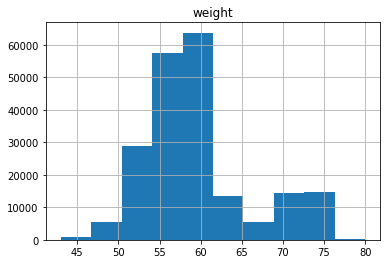

In [77]:
horses_selected_trimmed_clean.hist('weight')

In [78]:
len(horses_selected_trimmed_clean[
    (horses_selected_trimmed_clean['weight'] <= 0) |
    (horses_selected_trimmed_clean['weight'].isnull())
])

0

### `res_win`

`res_win = 1` if and only if `position = 1`.

array([[<AxesSubplot:title={'center':'res_win'}>]], dtype=object)

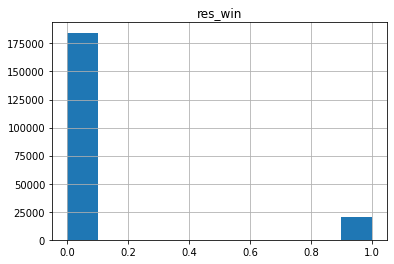

In [79]:
horses_selected_trimmed_clean.hist('res_win')

In [80]:
len(horses_selected_trimmed_clean[
    ((horses_selected_trimmed_clean['res_win'] == 1) & (horses_selected_trimmed_clean['position'] != 1)) |
    ((horses_selected_trimmed_clean['res_win'] != 1) & (horses_selected_trimmed_clean['position'] == 1))
])

0

Only thing left to do is make it an integer instead of a float.

In [81]:
horses_selected_trimmed_clean['res_win'] = horses_selected_trimmed_clean['res_win'].astype(int)

### `res_place`

To be consistent with how we changed the racing information, a horse "places" if and only if they achieve a position of 1 or 2 in a race with 5 or more runners.

In [82]:
def get_res_place(row: pd.core.frame.DataFrame) -> int:
    
    place_available = races_selected_trimmed_clean[
        races_selected_trimmed_clean['rid'] == row['rid']
    ].iloc[0]['placeAvailable']
    
    return int(row['position'] <= 2 and place_available)

In [83]:
horses_selected_trimmed_clean.head(10)

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,outHandicap,RPR,TR,OR,father,mother,gfather,weight,res_win,res_place
0,302858,Kings Return,6.0,4.0,0.600000,1,W P Mullins,D J Casey,1,0,...,0.0,102.0,NaN,NaN,King's Ride,Browne's Return,Deep Run,73,1,1.0
1,302858,Majestic Red I,6.0,5.0,0.047619,0,John Hackett,Conor O'Dwyer,2,8,...,0.0,94.0,NaN,NaN,Long Pond,Courtlough Lady,Giolla Mear,73,0,1.0
2,302858,Clearly Canadian,6.0,2.0,0.166667,0,D T Hughes,G Cotter,3,1.5,...,0.0,92.0,NaN,NaN,Nordico,Over The Seas,North Summit,71,0,0.0
3,302858,Bernestic Wonder,8.0,1.0,0.058824,0,E McNamara,J Old Jones,4,dist,...,0.0,NaN,NaN,NaN,Roselier,Miss Reindeer,Reindeer,73,0,0.0
4,302858,Beauty's Pride,5.0,6.0,0.038462,0,J J Lennon,T Martin,5,dist,...,0.0,NaN,NaN,NaN,Noalto,Elena's Beauty,Tarqogan,66,0,0.0
5,302858,Graignamanagh,6.0,3.0,0.307692,0,Harry De Bromhead,J R Barry,40,30,...,0.0,NaN,NaN,NaN,Tremblant,Feathermore,Crash Course,73,0,0.0
6,291347,Antonin,9.0,4.0,0.142857,0,Mrs S A Bramall,Conor O'Dwyer,1,0,...,0.0,157.0,NaN,NaN,Italic,Pin'Hup,Signani,63,1,1.0
7,291347,King Of The Gales,10.0,3.0,0.181818,0,A L T Moore,Charlie Swan,2,dist,...,0.0,NaN,NaN,NaN,Strong Gale,Paulas Fancy,Lucky Guy,66,0,1.0
8,291347,Carrigeen Kerria,9.0,7.0,0.047619,0,R H Lalor,D J Casey,3,5,...,16.0,NaN,NaN,NaN,Kemal,Carrigeensharraga,Walshford,60,0,1.0
9,291347,Fissure Seal,11.0,6.0,0.076923,0,A L T Moore,F Woods,40,30,...,0.0,NaN,NaN,NaN,Tug Of War,Annies Pet,Normandy,60,0,0.0


In [84]:
horses_selected_trimmed_clean.head(10).apply(get_res_place, axis=1)

0    1
1    1
2    0
3    0
4    0
5    0
6    1
7    1
8    0
9    0
dtype: int64

In [85]:
horses_selected_trimmed_clean['res_place'] = horses_selected_trimmed_clean.apply(get_res_place, axis=1)

### `res_show`

To be consistent with how we changed the racing information, a horse "shows" if and only if they achieve a position of 1,2, or 3 in a race with 8 or more runners.

In [86]:
def get_res_show(row: pd.core.frame.DataFrame) -> int:
    
    show_available = races_selected_trimmed_clean[
        races_selected_trimmed_clean['rid'] == row['rid']
    ].iloc[0]['showAvailable']
    
    return int(row['position'] <= 3 and show_available)

In [87]:
horses_selected_trimmed_clean.tail(10)

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,outHandicap,RPR,TR,OR,father,mother,gfather,weight,res_win,res_place
205128,227139,Young Brown,7.0,6.0,0.142857,0,D L Bolger,Mr D L Bolger,3,25,...,0.0,71.0,NaN,NaN,Rashar,Oughill,Ben Hawke,73,0,0
205129,227139,Musical Waves,7.0,10.0,0.090909,0,Cecil Ross,Mr W Ross,4,0.5,...,0.0,64.0,NaN,NaN,Orchestra,Seaville,Charlottesvilles Flyer,70,0,0
205130,227139,Ardeevin,8.0,1.0,0.181818,1,J P Kavanagh,Mr A Fleming,5,5,...,0.0,64.0,NaN,NaN,Lancastrian,Cailin Sona,Wolverlife,73,0,0
205131,227139,Music City Beat,9.0,4.0,0.047619,0,L J Fagan,Mr L J Fagan,6,0.5,...,0.0,63.0,NaN,NaN,Orchestra,Deep Sunday,Le Bavard,73,0,0
205132,227139,Nancymar,6.0,11.0,0.066667,0,L G Doyle,Mr D Whelan,7,6,...,0.0,52.0,NaN,NaN,Montelimar,Nancy's Sister,The Parson,70,0,0
205133,227139,Old Tim,6.0,5.0,0.142857,0,Donal Hassett,Mr B Hassett,8,15,...,0.0,42.0,NaN,NaN,Poet's Dream I,Settled,Blue Cashmere,73,0,0
205134,227139,Our Ling,6.0,12.0,0.111111,0,C P Donoghue,Philip Dempsey,9,13,...,0.0,24.0,NaN,NaN,Vaour,May-Ling,Mississippi,73,0,0
205135,227139,Ballinarrid,6.0,2.0,0.111111,0,Seamus P Murphy,Mr P Fenton,10,0.75,...,0.0,28.0,NaN,NaN,John French,Cuckaloo,Master Buck,76,0,0
205136,227139,Fountain Pen,9.0,3.0,0.047619,0,William J Fitzpatrick,Mr P Fahey,11,dist,...,0.0,NaN,NaN,NaN,Royal Fountain,Monday's Pet,Menelek,74,0,0
205137,227139,Marmat,7.0,9.0,0.153846,0,F J Bowles,Mr A J Martin,40,30,...,0.0,NaN,NaN,NaN,Cataldi,Hot Chic,Hot Grove,73,0,0


In [88]:
horses_selected_trimmed_clean.tail(10).apply(get_res_show, axis=1)

205128    1
205129    0
205130    0
205131    0
205132    0
205133    0
205134    0
205135    0
205136    0
205137    0
dtype: int64

In [89]:
horses_selected_trimmed_clean['res_show'] = horses_selected_trimmed_clean.apply(get_res_show, axis=1)

---

## Clean Racing Data

In [90]:
print("The following columns have null values (if nothing is printed below, there are no null values):")

for column in races_selected_trimmed_clean.columns:
    if sum(races_selected_trimmed_clean[column].isnull()) > 0:
        print(f"  - {column}")

The following columns have null values (if nothing is printed below, there are no null values):


### Station Readings

We want to check that the station readings are a good fit. There are two components to this. The first is making sure that the stations we select are sufficiently close to the racecourse and the second is making sure that the readings are taken at a time sufficiently close to the time of the race.

First, ensuring the stations are sufficiently close to the racecourses.

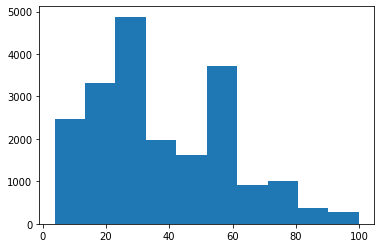

In [113]:
plt.hist(races_selected_trimmed_clean['dist to station'])
plt.show()

In [114]:
min(races_selected_trimmed_clean['dist to station'])

3.790936184663485

In [165]:
np.mean(races_selected_trimmed_clean['dist to station'])

37.26391942791042

In [115]:
max(races_selected_trimmed_clean['dist to station'])

99.86014331733358

In [116]:
np.mean(races_selected_trimmed_clean['dist to station'] < 35)

0.5273672953529068

In [164]:
races_selected_trimmed_clean['dist to station'].quantile(0.5)

32.505278043383164

These results were not what we hoped for, but this is the best that the available data will yield. For this reason, we will not truncate the dataset at this step. If at all, we will do so at a later step. We will make our assumptions clear in the writeup.

Next, ensuring the readings are taken at a time sufficiently close to the time of the race.

array([[<AxesSubplot:title={'center':'station reading timedelta'}>]],
      dtype=object)

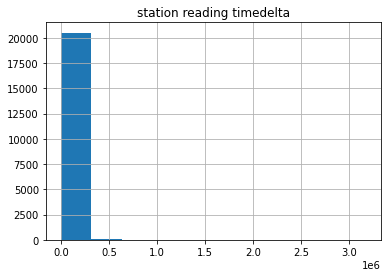

In [117]:
races_selected_trimmed_clean.hist('station reading timedelta')

In [118]:
np.mean(races_selected_trimmed_clean['station reading timedelta'] <= 30)

0.9861948279214466

This is much more promising. Since 99.3\% of the data is collected within 30 minutes of the race, we will drop those few races where this is not true. Perhaps, at data points where this is not true, the station was down for maintenance or due to a power outage such that it wasn't collecting data.

In [119]:
races_selected_trimmed_clean = races_selected_trimmed_clean[
    races_selected_trimmed_clean['station reading timedelta'] <= 30
]
races_selected_trimmed_clean.shape

(20288, 34)

In [120]:
horses_selected_trimmed_clean = horses_selected_trimmed_clean[
    horses_selected_trimmed_clean['rid'].isin(races_selected_trimmed_clean['rid'])
]
horses_selected_trimmed_clean.shape

(202963, 22)

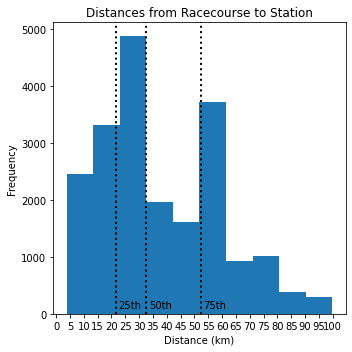

In [163]:
fig = plt.figure(figsize=(5,5))
gs = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(gs[0:1, 0:1])

ax1.set_title("Distances from Racecourse to Station")
ax1.hist(races_selected_trimmed['dist to station'])
ax1.set_xticks(np.arange(0, 105, 5)) 
ax1.set_xticklabels(np.arange(0, 105, 5), fontsize=10)
ax1.set_xlabel("Distance (km)")
ax1.set_ylabel("Frequency")

quants = [
    races_selected_trimmed['dist to station'].quantile(0.25),
    races_selected_trimmed['dist to station'].quantile(0.50),
    races_selected_trimmed['dist to station'].quantile(0.75),
]

for i in quants:
    ax1.axvline(i, ymax=1, lw=2, linestyle=":", color="black")

ax1.text(quants[0] + 1, 100, "25th")
ax1.text(quants[1] + 1, 100, "50th")
ax1.text(quants[2] + 1, 100, "75th")

plt.tight_layout()

fig.savefig(f"{BASE_DIR}/figures/distances_from_racecourse_to_station.png")

plt.show()

### `winningTime`

It was found that some `winningTime` values are nonpositive, which does not make sense. We will drop any columns where this is true.

In [99]:
races_selected_trimmed_clean = races_selected_trimmed_clean[
    races_selected_trimmed_clean['winningTime'] > 0
]
len(races_selected_trimmed_clean)

20201

In [100]:
horses_selected_trimmed_clean = horses_selected_trimmed_clean[
    horses_selected_trimmed_clean['rid'].isin(races_selected_trimmed_clean['rid'])
]
len(horses_selected_trimmed_clean)

202304

### `datetime`

Make this a true datetime.

In [110]:
races_selected_trimmed_clean['datetime'] = pd.to_datetime(races_selected_trimmed_clean['datetime'])

---

## Review

In [101]:
horses_selected_trimmed_clean.head()

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,RPR,TR,OR,father,mother,gfather,weight,res_win,res_place,res_show
0,302858,Kings Return,6.0,4.0,0.600000,1,W P Mullins,D J Casey,1,0,...,102.0,NaN,NaN,King's Ride,Browne's Return,Deep Run,73,1,1,0
1,302858,Majestic Red I,6.0,5.0,0.047619,0,John Hackett,Conor O'Dwyer,2,8,...,94.0,NaN,NaN,Long Pond,Courtlough Lady,Giolla Mear,73,0,1,0
2,302858,Clearly Canadian,6.0,2.0,0.166667,0,D T Hughes,G Cotter,3,1.5,...,92.0,NaN,NaN,Nordico,Over The Seas,North Summit,71,0,0,0
3,302858,Bernestic Wonder,8.0,1.0,0.058824,0,E McNamara,J Old Jones,4,dist,...,NaN,NaN,NaN,Roselier,Miss Reindeer,Reindeer,73,0,0,0
4,302858,Beauty's Pride,5.0,6.0,0.038462,0,J J Lennon,T Martin,5,dist,...,NaN,NaN,NaN,Noalto,Elena's Beauty,Tarqogan,66,0,0,0


In [102]:
horses_selected_trimmed_clean.shape

(202304, 22)

In [103]:
races_selected_trimmed_clean.head()

,rid,course,title,winningTime,metric,ncond,class,runners,margin,1st_place_rank_in_odds,...,station name,station lat,station lng,dist to station,station reading date,temp,msl,rain,rhum,station reading timedelta
0,302858,Thurles,Liffey Maiden Hurdle (Div 1),277.2,3821.0,1,0,6,1.219263,1,...,BIRR,53.0525,-7.5325,45.288813,1/9/97 12:00,1.6,1012.4,0.0,87,15.0
1,291347,Punchestown,Ericsson G.S.M. Grand National Trial Handicap ...,447.2,5229.0,5,0,9,1.218049,4,...,CASEMENT,53.1820,-6.2620,24.477602,2/16/97 15:00,8.0,992.5,0.4,87,20.0
2,75447,Listowel,Ballybunion E.B.F. Beginners S'chase,318.4,3620.0,5,0,8,1.277320,3,...,SHANNON AIRPORT,52.4125,-8.5505,63.534139,3/1/97 14:00,12.0,1003.5,0.0,73,0.0
3,358038,Punchestown,Quinns Of Baltinglass Chase (La Touche) (Cross...,533.9,6637.0,1,0,10,1.286595,1,...,CASEMENT,53.1820,-6.2620,24.477602,4/24/97 14:00,12.6,1011.9,0.0,72,20.0
6,89211,Tipperary,Topaz Sprint Stakes (Listed),59.9,1005.0,4,0,5,1.217043,4,...,SHANNON AIRPORT,52.4125,-8.5505,25.222137,5/8/97 17:00,11.1,994.2,0.0,59,30.0


In [104]:
races_selected_trimmed_clean.shape

(20201, 34)

---

## Save Dataframes

In [105]:
horses_selected_trimmed_clean.to_csv(f"{BASE_DIR}/data/streamline/horses_selected_trimmed_clean.csv", index=False)

In [111]:
races_selected_trimmed_clean.to_csv(f"{BASE_DIR}/data/streamline/races_selected_trimmed_clean.csv", index=False)

---